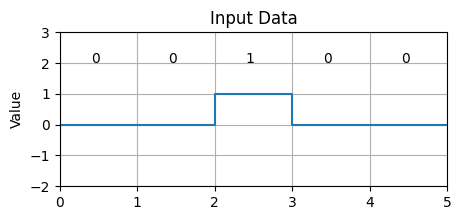

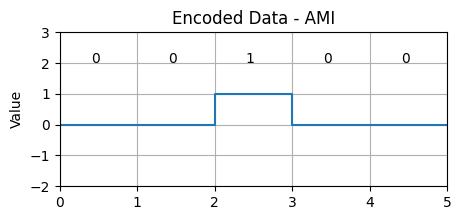

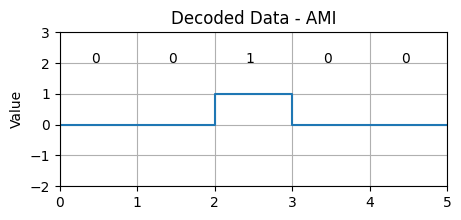

In [5]:
import PySimpleGUI as sg
import matplotlib.pyplot as plt
import numpy as np
import random

def randSeq(length, probability):
    random.seed(0)
    val = []

    if probability == 1:
        lst = [1, 0]
        for _ in range(0, length):
            val.append(random.choice(lst))
    elif probability == 2:
        lst = [1, 0, 0, 0]
        for _ in range(0, length):
            val.append(random.choice(lst))
    elif probability == 3:
        lst = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
        for _ in range(0, length):
            val.append(random.choice(lst))
    return val

class LineEncoderGUI:
    def __init__(self):
        sg.theme("DarkGrey5")

        self.layout = [
            [sg.Text("Line Encoder GUI", font=("Helvetica", 16))],
            [sg.Button("Initialize Random Input"), sg.Button("Enter Custom Input")],
            [sg.Multiline(size=(40, 6), key="-INPUT-", disabled=True)],
            [sg.Button("Encode"), sg.Button("Show Graph"), sg.Button("Exit")],
            [sg.Multiline(size=(40, 6), key="-OUTPUT-", disabled=True)]
        ]

        self.window = sg.Window("Line Encoder GUI", self.layout, finalize=True)
        self.input_data = []

    def run(self):
        while True:
            event, values = self.window.read()

            if event == sg.WIN_CLOSED or event == "Exit":
                break
            elif event == "Initialize Random Input":
                self.initialize_random_input()
            elif event == "Enter Custom Input":
                self.enter_custom_input()
            elif event == "Encode":
                self.encode_data()
            elif event == "Show Graph":
                self.show_graph()

        self.window.close()

    def initialize_random_input(self):
        length = sg.popup_get_text("Enter the length of the random input:")
        probability = sg.popup_get_text("Choose the ratio of 0:1\n1-50:50\n2-75:25\n3-85:15\nEnter your choice:")
        self.input_data = randSeq(int(length), int(probability))
        self.window["-INPUT-"].update(f"Random Input Data\n{self.input_data}")
        self.plot_data(self.input_data, "Input Data")

    def enter_custom_input(self):
        data = sg.popup_get_text("Enter your Custom Input in NRZ Format:")
        self.input_data = [int(bit) for bit in data]
        self.window["-INPUT-"].update(f"Input Data\n{self.input_data}")
        self.plot_data(self.input_data, "Input Data")

    def encode_data(self):
        if not self.input_data:
            sg.popup_error("Please initialize or enter input data first.")
            return

        schemes = ["Polar NRZ-L", "Polar NRZ-I", "Manchester", "Polar RZ", "AMI", "Scrambling AMI B8ZS",
                   "Differential Manchester", "Scrambling AMI HBD3", "PCM", "Delta Modulation"]

        encode_choice = sg.popup_get_text("Enter the number for encoding scheme:\n"
                                          "1: Polar NRZ-L\n2: Polar NRZ-I\n3: Manchester\n"
                                          "4: Polar RZ\n5: AMI\n6: Scrambling AMI B8ZS\n"
                                          "7: Differential Manchester\n8: Scrambling AMI HBD3\n"
                                          "9: PCM\n10: Delta Modulation")

        if encode_choice and encode_choice.isdigit() and 1 <= int(encode_choice) <= 10:
            result = self.line_encoder(int(encode_choice), self.input_data)
            self.window["-OUTPUT-"].update(f"\nEncoded Data for {schemes[int(encode_choice) - 1]}\n{result}")
            self.plot_data(result, f"Encoded Data - {schemes[int(encode_choice) - 1]}")

            decode_choice = sg.popup_yes_no("Do you want to decode the signal?")
            if decode_choice == "Yes":
                decoded_data = self.line_decoder(int(encode_choice), result)
                self.window["-OUTPUT-"].update(f"\nDecoded Data for {schemes[int(encode_choice) - 1]}\n{decoded_data}")
                self.plot_data(decoded_data, f"Decoded Data - {schemes[int(encode_choice) - 1]}")

    def show_graph(self):
        if not self.input_data:
            sg.popup_error("Please initialize or enter input data first.")
            return

        schemes = ["Input Data", "Polar NRZ-L", "Polar NRZ-I", "Manchester", "Polar RZ", "AMI", "Scrambling AMI B8ZS",
                   "Differential Manchester", "Scrambling AMI HBD3", "PCM", "Delta Modulation"]

        for i in range(len(schemes)):
            plt.figure()
            if i == 0:
                self.plot_data(self.input_data, "Input Data", enlarge=True)
            else:
                encoded_data = self.line_encoder(i, self.input_data)
                self.plot_data(encoded_data, f"{schemes[i]} - Encoded", enlarge=True)

        plt.show()

    @staticmethod
    def plot_data(data, title, enlarge=False):
        if not data:
            sg.popup_error("Data is empty. Nothing to plot.")
            return

        x = np.arange(0, len(data) + 1)
        plt.xlim(0, len(data))

        # Check if data is not empty before calculating min and max
        if data:
            plt.ylim(min(data) - 2, max(data) + 2)

        plt.ylabel('Value')
        plt.title(title)
        array = data
        for i in range(len(data)):
            plt.text(i + 0.4, max(data) + 1, array[i])

        plt.style.use('default')  # Use a default style

        plt.grid(1)
        plt.xticks(x)
        plt.step(x, [array[0]] + array)
        if enlarge:
            plt.gcf().set_size_inches(10, 4)
        else:
            plt.gcf().set_size_inches(5, 2)
        plt.show()

    @staticmethod
    def line_encoder(ch, input_data):
        # Add your line encoding logic here
        return input_data  # Placeholder, replace with actual logic

    @staticmethod
    def line_decoder(ch, result):
        # Add your line decoding logic here
        return result  # Placeholder, replace with actual logic

if __name__ == '__main__':
    gui = LineEncoderGUI()
    gui.run()
